In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from src.datasets import load_train_test
from src.portfolio import Portfolio

import pandas as pd
import warnings
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

2024-02-26 14:21:08.890692: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 14:21:08.890743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 14:21:08.891648: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 14:21:08.897530: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-26 14:21:09.586801: W tensorflow/compiler/tf2

In [2]:

def train(X_train, y_train, num_epochs, batch_size, learning_rate):
    model = Sequential()
    model.add(LSTM(units=X_train.shape[2]*4, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(units=y_train.shape[1]))  # output for optimal weights for next week.

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=1)
    return model

tickers = ['AAPL', 'MSFT', 'GOOG', 'META', 'TSLA', 'SPY']
start = '2010-01-01'
end = '2024-01-01'
num_epochs=128
batch_size=32
learning_rate=0.001

yfdata, features, targets, X, y, y_price = load_train_test(tickers, start, end)

print('========= Original Dataset =========')
print('features', features.shape, 'columns', features.index[0], features.index[-1])
print('targets', targets.shape, 'columns', targets.index[0], targets.index[-1])
print('X', X.shape)
print('y', y.shape)
print('y_price', y_price.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print('========= Train / Test Dataset =========')
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('y_price', y_price.shape)


[*********************100%%**********************]  6 of 6 completed


---- Creating Training Set
(2890, 126)
(2890, 7)
(2890, 7)
========= Original Dataset =========
features (2890, 126) columns 2012-07-06 00:00:00 2023-12-29 00:00:00
targets (2890, 7) columns 2012-07-06 00:00:00 2023-12-29 00:00:00
X (578, 10, 126)
y (578, 7)
y_price (578, 7)
========= Train / Test Dataset =========
X_train (462, 10, 126)
X_test (116, 10, 126)
y_train (462, 7)
y_test (116, 7)
y_price (578, 7)


In [3]:

model = train(X_train, y_train, num_epochs, batch_size, learning_rate)

2024-02-26 14:21:12.156188: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 14:21:12.175628: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 14:21:12.176157: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 14:21:12.178620: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 14:21:12.179232: I external/local_xla/xla/stream_executor

Epoch 1/128


2024-02-26 14:21:14.218692: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-26 14:21:17.811526: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.2481 - loss: 0.2575 - val_accuracy: 0.1183 - val_loss: 0.1627
Epoch 2/128
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1521 - loss: 0.1378 - val_accuracy: 0.2688 - val_loss: 0.1142
Epoch 3/128
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1944 - loss: 0.1184 - val_accuracy: 0.2043 - val_loss: 0.1113
Epoch 4/128
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1508 - loss: 0.1055 - val_accuracy: 0.1720 - val_loss: 0.1045
Epoch 5/128
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2094 - loss: 0.0974 - val_accuracy: 0.1828 - val_loss: 0.0990
Epoch 6/128
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2023 - loss: 0.0910 - val_accuracy: 0.2151 - val_loss: 0.0963
Epoch 7/128
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2273 - loss: 0.0849 - val_accuracy: 0.2043 - val_loss: 0.0945
Epoch 8/128
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2350 - loss: 0.0771 - val_accuracy: 0.2043 - val_l

In [4]:

optimal_portfolio = Portfolio.portfolio_returns('optimal', y_test, y_price[-1*len(y_test):])
model_portfolio = Portfolio.portfolio_returns('model', model.predict(X_test), y_price[-1*len(y_test):])

overall = optimal_portfolio.join(model_portfolio)

print(overall)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
            optimal_returns  optimal_cumrets  model_returns  model_cumrets
2021-09-20         0.046630         1.046630       0.047506       1.047506
2021-09-24         0.000966         1.047641      -0.018456       1.028173
2021-10-01         0.019185         1.067739      -0.007535       1.020426
2021-10-08         0.047296         1.118239       0.037423       1.058614
2021-10-15         0.054126         1.178765       0.019254       1.078996
...                     ...              ...            ...            ...
2023-11-27         0.004733        74.156843      -0.041951       1.235630
2023-12-04         0.034417        76.709090       0.031319       1.274330
2023-12-08         0.028552        78.899256       0.017891       1.297129
2023-12-15         0.054070        83.165325       0.023377       1.327452
2023-12-22         0.000000        83.165325       0.000000       1.327452

[116 rows x 4 columns]


<Axes: >

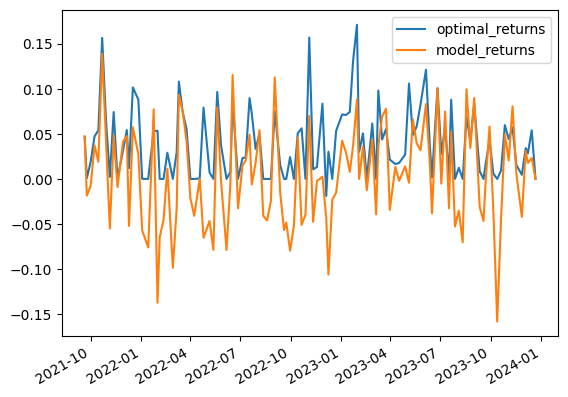

In [7]:
overall[['optimal_returns', 'model_returns']].plot()

<Axes: >

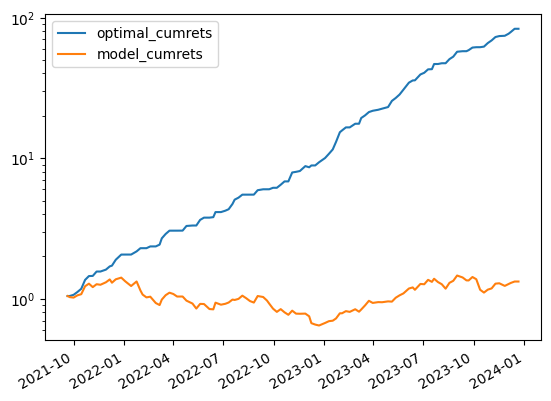

In [8]:
overall[['optimal_cumrets', 'model_cumrets']].plot(logy=True)